In [1]:
#import library
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import joblib
from nltk.corpus import stopwords

In [2]:
# loading and visualizing the data
Data = pd.read_csv('/home/abdifatah/Ingenieur_Machine_Learning/QueryResults_3.csv',sep=',')
Data.head(5)

,Id,Body,Title,Tags
0,4,<p>I want to use a <code>Track-Bar</code> to c...,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...
1,9,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age based on a Da...,<c#><.net><datetime>
2,11,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
3,16,<p>How do you expose a LINQ query as an ASMX w...,Filling a DataSet or a DataTable from a LINQ q...,<c#><linq><web-services><.net-3.5>
4,17,"<p>How do I store binary data in <a href=""http...",Binary Data in MySQL,<mysql><database><binary-data><data-storage>


In [3]:
df = Data.copy()

In [4]:
print((df.isna().sum()/df.shape[0]).sort_values(ascending = True))

Id       0.0
Body     0.0
Title    0.0
Tags     0.0
dtype: float64


In [5]:
df = df.drop(columns = ['Id'])

the data i have downloaded is comprised of 50000 subject each containing :<br>
1-Title<br>
2-Body<br>
3-Tags<br>
All 3 columns are full, there is no empty data<br>

# Data Exploration

In [6]:
# tokenization function
def Tokenization(text):
    x = []
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    for row in text:
        x.append(tokenizer.tokenize(row))
    return x

In [7]:
Body = df.Body
Title = df.Title
Tags = df.Tags

tkz_Body = Tokenization(Body)
tkz_Tags = Tokenization(Tags)
tkz_Title = Tokenization(Title)

In [8]:
# this function return the avergae number of word for each Title, Body and Tags
def text_caracteristics(texte):
    nb_word = []
    max_nb_word = 0
    min_nb_word = 0
    mean_nb_word = 0
    for i in range(len(texte)):
        nb_word.append(len(texte[i]))
    max_nb_word=max(nb_word)
    min_nb_word=min(nb_word)
    mean_nb_word= sum(nb_word)/len(nb_word)
    return (max_nb_word,min_nb_word,mean_nb_word)

In [15]:
(max_nb_word ,min_nb_word, mean_nb_word) = text_caracteristics(tkz_Body)
print('for Body : \n1% average number of words: ',mean_nb_word,'.',' max number of words : ' ,max_nb_word,'.',' min number of words : ',min_nb_word)

for Body : 
1% average number of words:  117.7445 .  max number of words :  5300 .  min number of words :  5


In [16]:
(max_nb_word ,min_nb_word, mean_nb_word) = text_caracteristics(tkz_Title)
print('for Title : \n1% average number of words: ',mean_nb_word,'.',' max number of words : ' ,max_nb_word,'.',' min number of words : ',min_nb_word)

for Title : 
1% average number of words:  8.57162 .  max number of words :  33 .  min number of words :  1


In [17]:
(max_nb_word ,min_nb_word, mean_nb_word) = text_caracteristics(tkz_Tags)
print('for Tags : \n1% average number of Tags: ',mean_nb_word,'.',' max number of Tags : ' ,max_nb_word,'.',' min number of Tags : ',min_nb_word)

for Tags : 
1% average number of Tags:  3.70784 .  max number of Tags :  17 .  min number of Tags :  1


We will check now the 100 most frequent words

In [19]:
# creating list for each unique word/Tags in our variables
all_words_Body = []
for i in range(len(tkz_Body)):
    for j in range(len(tkz_Body[i])):
        all_words_Body.append(tkz_Body[i][j])
all_words_Title = []
for i in range(len(tkz_Title)):
    for j in range(len(tkz_Title[i])):
        all_words_Title.append(tkz_Title[i][j])
        
all_words_Tags = []
for i in range(len(tkz_Tags)):
    for j in range(len(tkz_Tags[i])):
        all_words_Tags.append(tkz_Tags[i][j])
        

# creating dataframes using the list created earlier as a feature
all_words_Body_df = pd.DataFrame()
all_words_Title_df = pd.DataFrame()
all_words_Tags_df = pd.DataFrame()
all_words_Body_df['Body_words'] = all_words_Body
all_words_Title_df['Title_words'] = all_words_Title
all_words_Tags_df['Tags_words'] = all_words_Tags

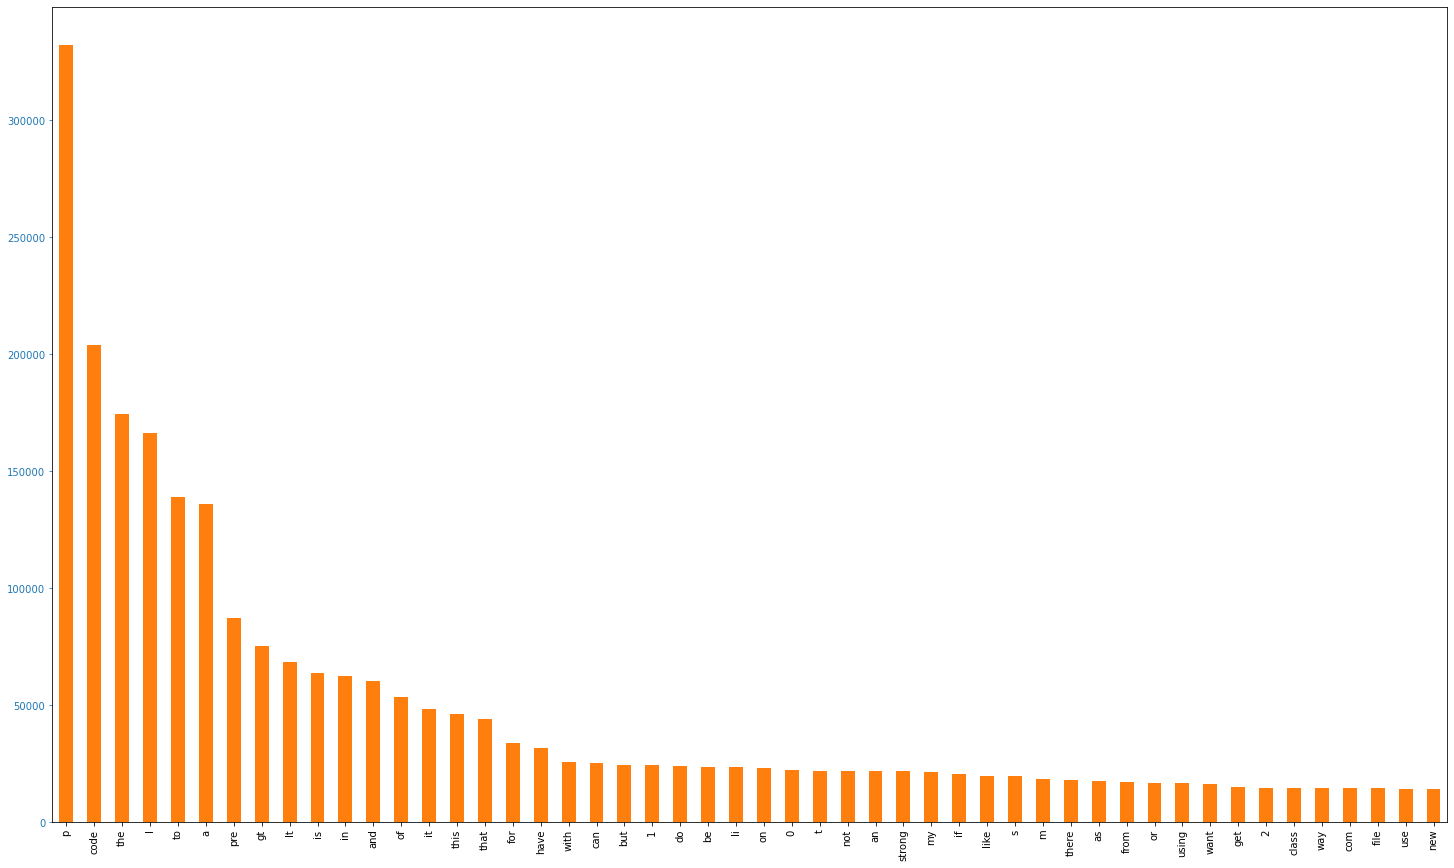

In [20]:
# figure caracteristic
fig = plt.figure(figsize = (25,15))
ax1 = plt.subplot()
# histogram
ax1 = all_words_Body_df.Body_words.value_counts().sort_values(ascending=False)[0:50].plot(kind='bar',color="C1")
plt.xticks(rotation=90)
# colors
ax1.tick_params(axis="y", colors="C0")
# Annotations
plt.xticks(rotation=90)
plt.show()

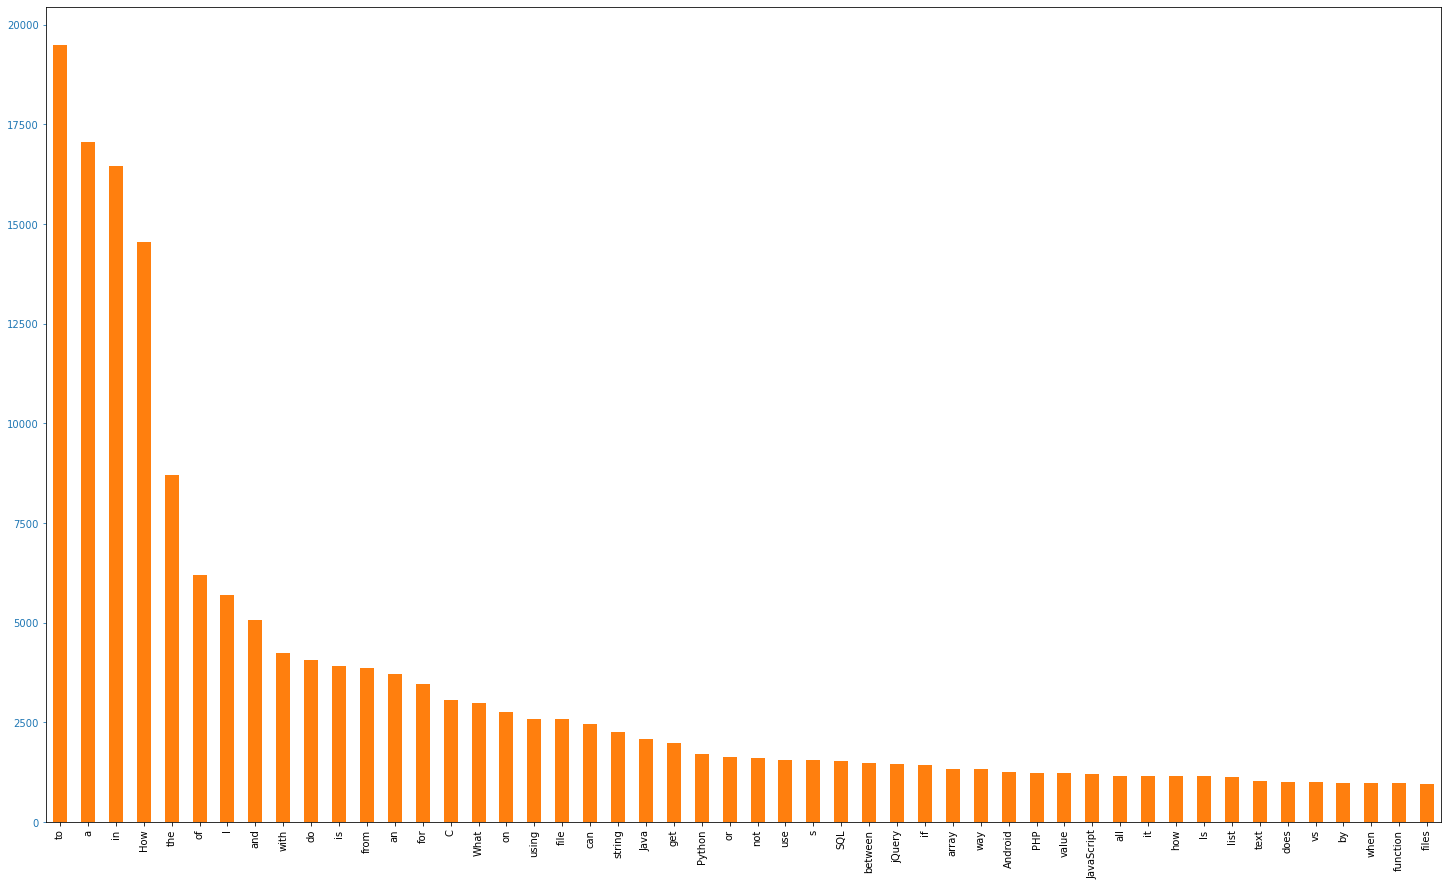

In [23]:
# figure caracteristic
fig = plt.figure(figsize = (25,15))
ax1 = plt.subplot()
# histogram
ax1 = all_words_Title_df.Title_words.value_counts().sort_values(ascending=False)[0:50].plot(kind='bar',color="C1")
plt.xticks(rotation=90)
# colors
ax1.tick_params(axis="y", colors="C0")
# Annotations
plt.xticks(rotation=90)
plt.show()

We see that most of the most frequents words are stop_words or words that don't add much to the understanding of the subject. <br>
We will delete them.

In [24]:
# removing stop words
def delete_stopwords(texte):
    cleaned_sentence = []
    cleaned_texte = []
    for sentence in texte:
        for word in sentence:
            if word not in stopwords.words('english'):
                cleaned_sentence.append(word)
        cleaned_texte.append(cleaned_sentence)
        cleaned_sentence = []
    return cleaned_texte

# removing frequent_words
def delete_frequent_words(texte,series):
    
    frequent_words = list(series.value_counts().sort_values(ascending=False)[0:100].index)
    #to_keep = ['string', 'http', 'java', 'android', 'list']
    cleaned_sentence = []
    cleaned_texte = []
    for sentence in texte:
        for word in sentence:
            if word not in frequent_words:
                cleaned_sentence.append(word)
        cleaned_texte.append(cleaned_sentence)
        cleaned_sentence = []
    return cleaned_texte

def cleaning(texte,series):
    texte = delete_stopwords(texte)
    texte = delete_frequent_words(texte,series)
    return texte

In [25]:
cleaned_Body = cleaning(tkz_Body,all_words_Body_df.Body_words)
cleaned_Title = cleaning(tkz_Title,all_words_Title_df.Title_words)

In [26]:
all_words_Body = []
for i in range(len(cleaned_Body)):
    for j in range(len(cleaned_Body[i])):
        all_words_Body.append(cleaned_Body[i][j])
all_words_Title = []
for i in range(len(cleaned_Title)):
    for j in range(len(cleaned_Title[i])):
        all_words_Title.append(cleaned_Title[i][j])
        

        

all_words_Body_df = pd.DataFrame()
all_words_Title_df = pd.DataFrame()
all_words_Body_df['Body_words'] = all_words_Body
all_words_Title_df['Title_words'] = all_words_Title

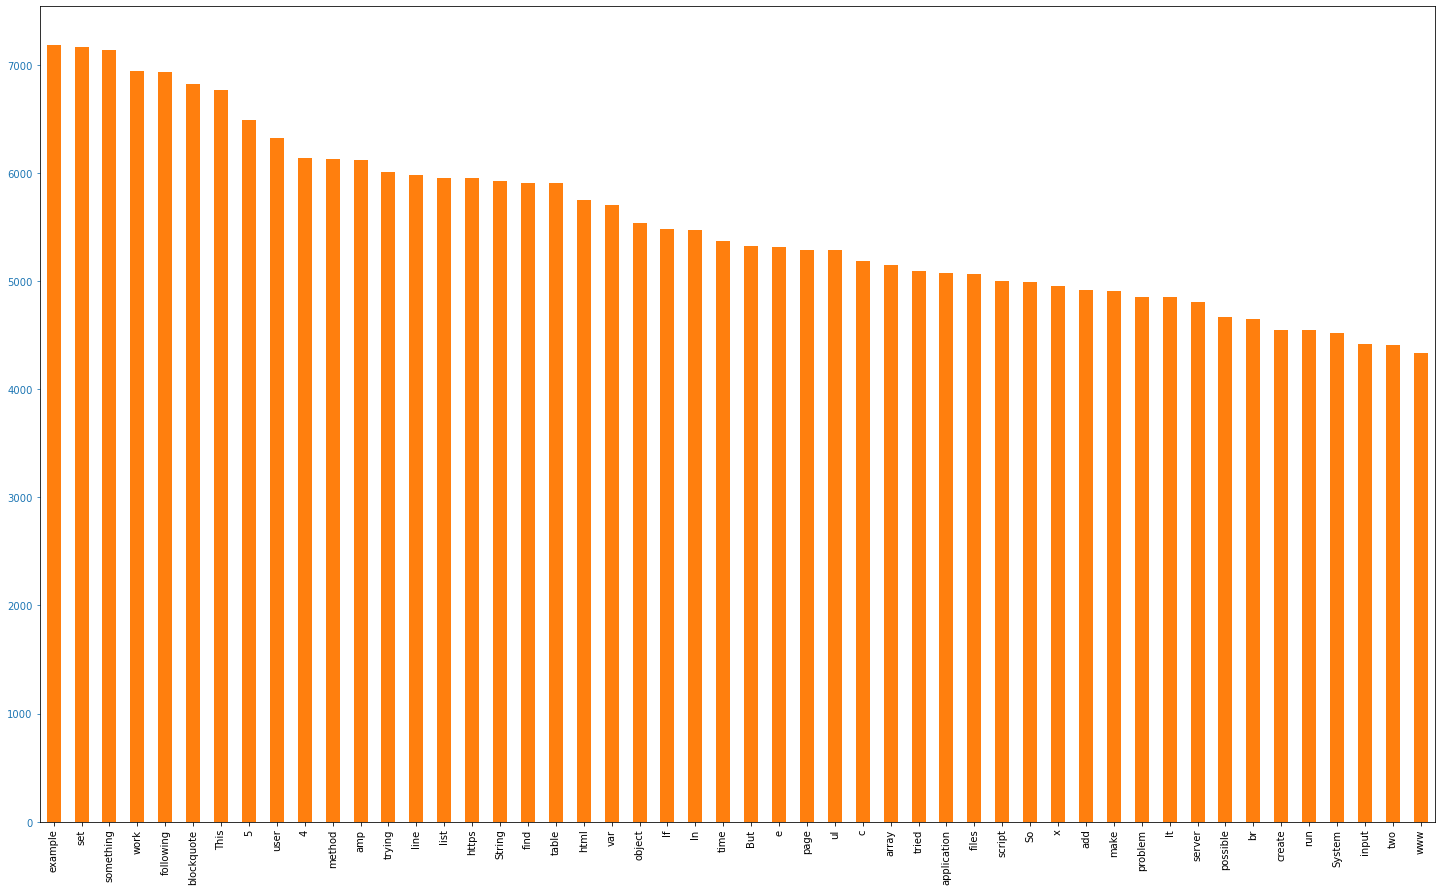

In [27]:
# figure caracteristic
fig = plt.figure(figsize = (25,15))
ax1 = plt.subplot()
# histogram
ax1 = all_words_Body_df.Body_words.value_counts().sort_values(ascending=False)[0:50].plot(kind='bar',color="C1")
plt.xticks(rotation=90)
# colors
ax1.tick_params(axis="y", colors="C0")
# Annotations
plt.xticks(rotation=90)
plt.show()

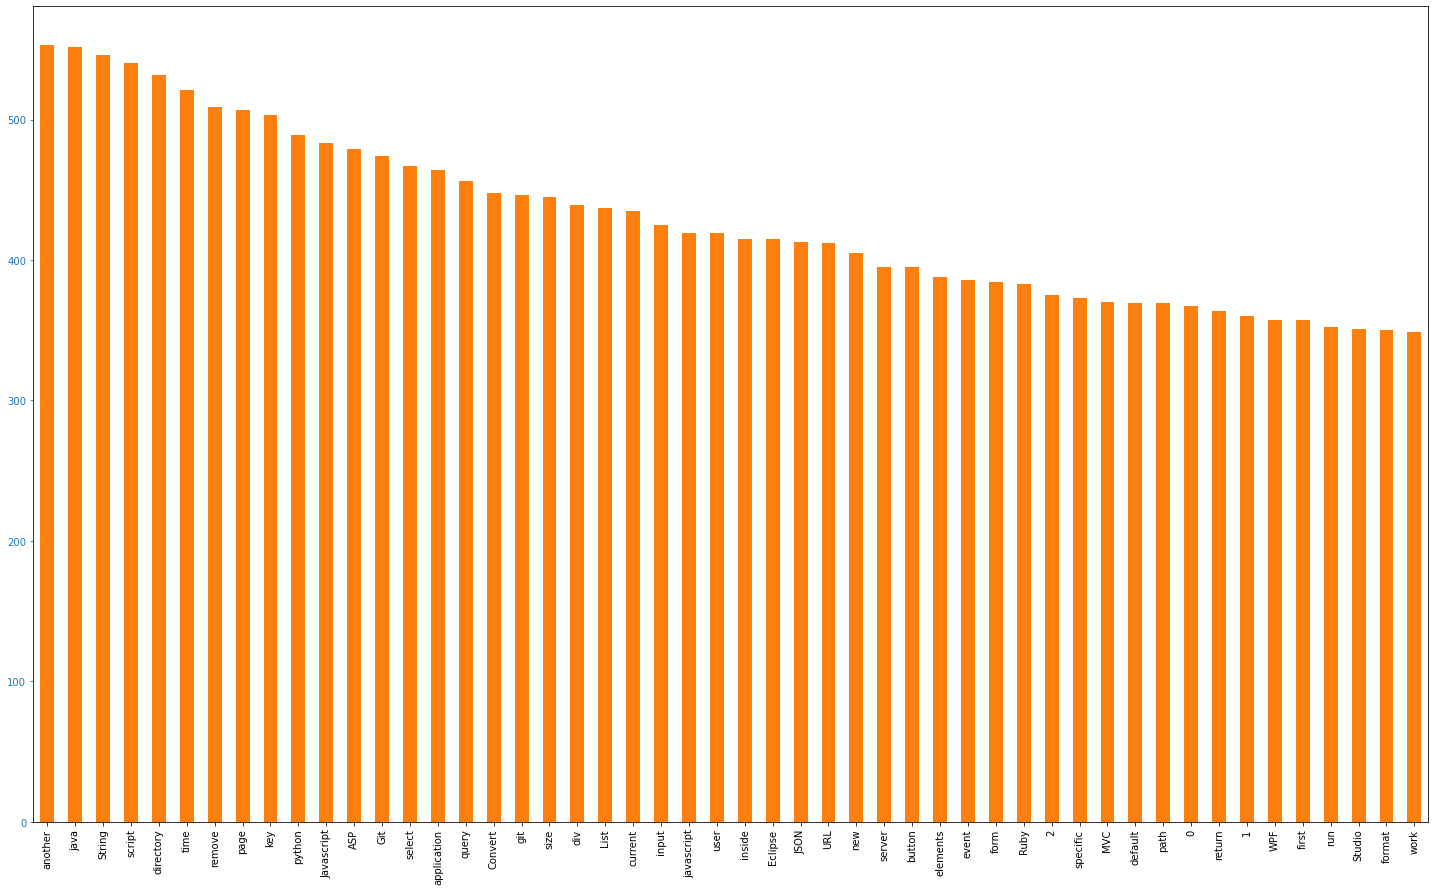

In [28]:
# figure caracteristic
fig = plt.figure(figsize = (25,15))
ax1 = plt.subplot()
# histogram
ax1 = all_words_Title_df.Title_words.value_counts().sort_values(ascending=False)[0:50].plot(kind='bar',color="C1")
plt.xticks(rotation=90)
# colors
ax1.tick_params(axis="y", colors="C0")
# Annotations
plt.xticks(rotation=90)
plt.show()

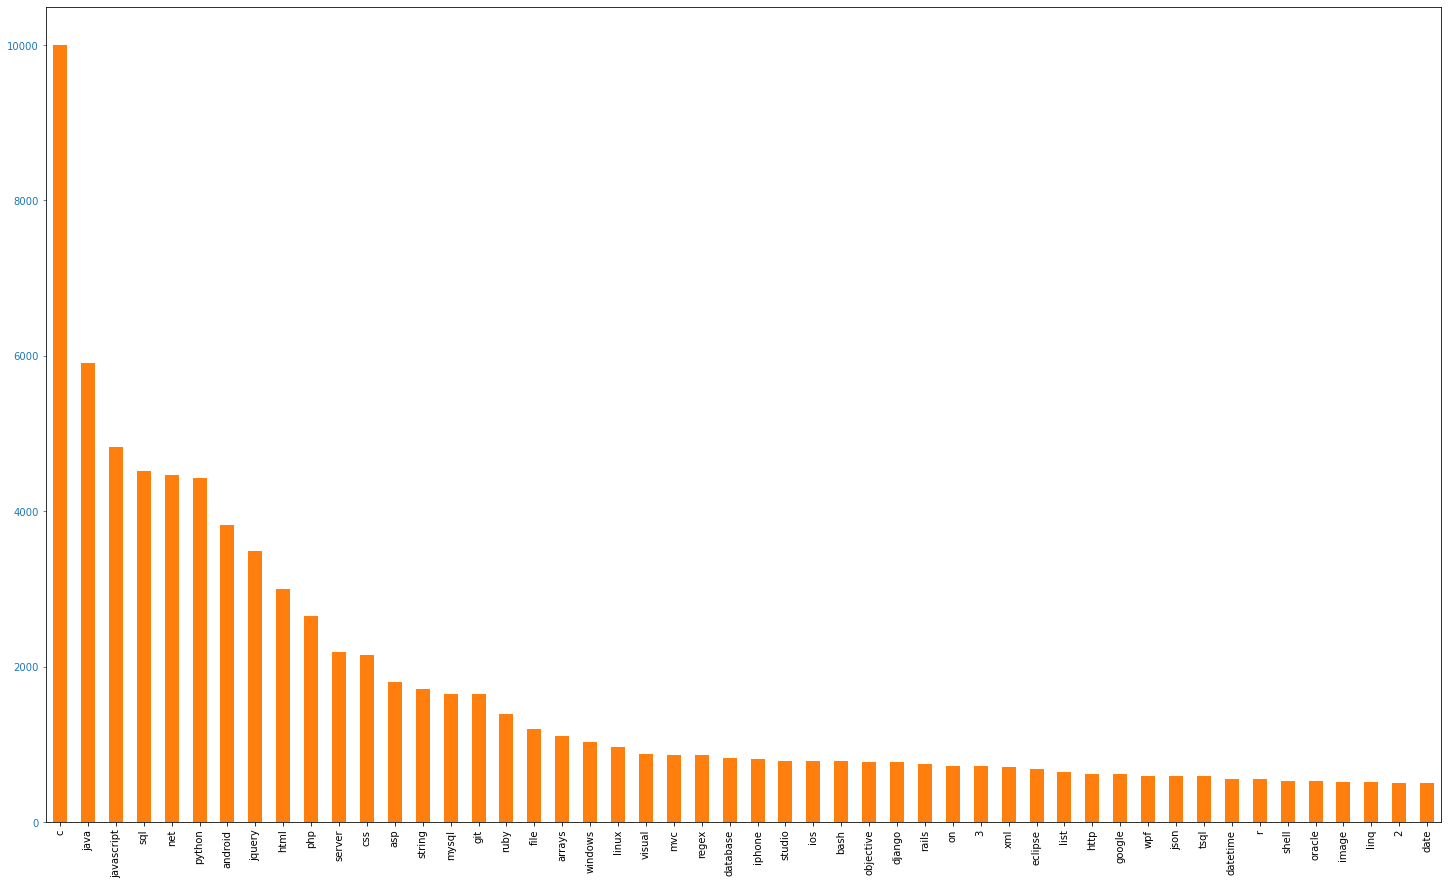

In [29]:
# figure caracteristic
fig = plt.figure(figsize = (25,15))
ax1 = plt.subplot()
# histogram
ax1 = all_words_Tags_df.Tags_words.value_counts().sort_values(ascending=False)[0:50].plot(kind='bar',color="C1")
plt.xticks(rotation=90)
# colors
ax1.tick_params(axis="y", colors="C0")
# Annotations
plt.xticks(rotation=90)
plt.show()